🎯 Objetivos de la sesión:

Al finalizar esta sesión, serás capaz de:

* Identificar los tipos de datos presentes en un dataset y modificarlos según corresponda.

* Crear nuevas variables a partir de condiciones lógicas y funciones personalizadas.

* Detectar y tratar valores nulos en un dataset.

* Agrupar datos y calcular estadísticas agregadas.

* Crear tablas dinámicas (pivot tables) para explorar relaciones entre variables.

* Unir o combinar diferentes subconjuntos de un dataset.


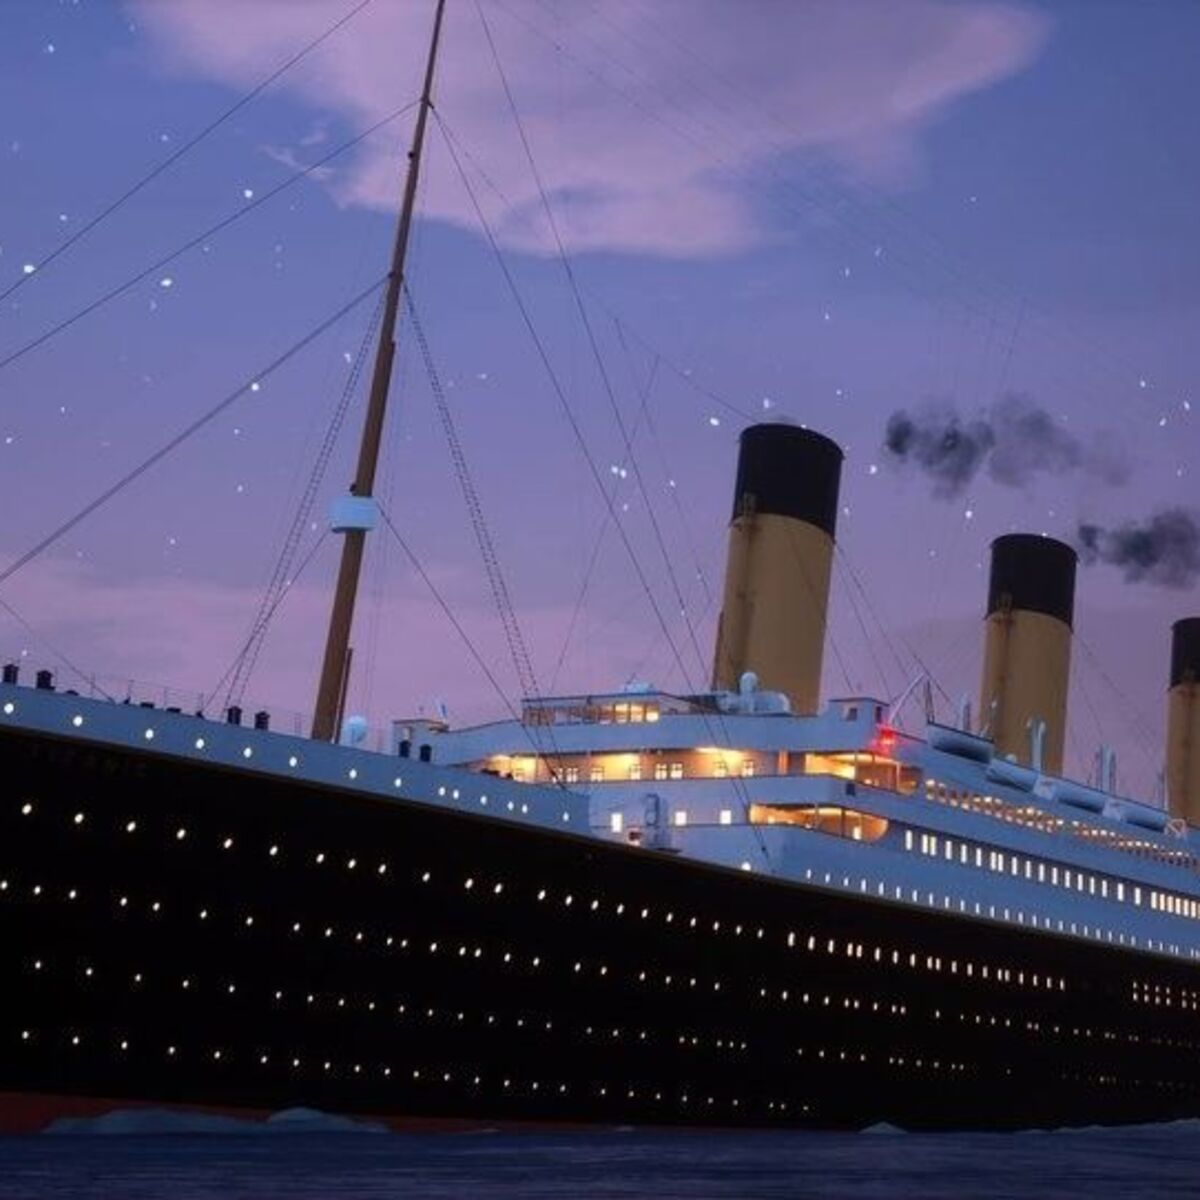

# 🛳️ Dataset Titanic
El dataset Titanic es uno de los más conocidos en el mundo de la ciencia de datos y aprendizaje automático. Fue creado a partir de los datos de pasajeros del famoso transatlántico RMS Titanic, que se hundió en su viaje inaugural en abril de 1912 tras chocar contra un iceberg.

El objetivo clásico al trabajar con este dataset es predecir si un pasajero sobrevivió o no, en base a diferentes características como clase, edad, sexo, etc. Es ideal para practicar tareas de limpieza, visualización, modelado y análisis exploratorio de datos.

## 📄 Descripción de las columnas del dataset

| **Columna**     | **Descripción**                                                                 |
|-----------------|----------------------------------------------------------------------------------|
| PassengerId     | ID único para cada pasajero                                                     |
| Survived        | Indicador de supervivencia: `0 = No`, `1 = Sí`                                  |
| Pclass          | Clase del pasajero (1ra, 2da o 3ra clase)                                       |
| Name            | Nombre completo del pasajero (a menudo incluye título como Mr., Mrs., etc.)     |
| Sex             | Sexo del pasajero (`male` o `female`)                                           |
| Age             | Edad del pasajero en años. Puede contener valores nulos                         |
| SibSp           | Número de hermanos o cónyuges que viajaban con el pasajero                      |
| Parch           | Número de padres o hijos que viajaban con el pasajero                           |
| Ticket          | Número del boleto                                                               |
| Fare            | Tarifa pagada por el boleto                                                     |
| Cabin           | Cabina del pasajero (muchas veces está vacía)                                   |
| Embarked        | Puerto de embarque: `C = Cherbourg`, `Q = Queenstown`, `S = Southampton`        |
| Embarking_Date  | Fecha en la que se embarcó el pasajero.|



## Cargue de datos y exploración inicial

In [ ]:
import pandas as pd
import numpy as np

url = 'https://raw.githubusercontent.com/gbuvoli/Datasets/refs/heads/main/titanic_with_dates.csv'
df = pd.read_csv(url)
print(df.shape)
df.head()

(889, 13)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_Date
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1912-04-10T12:14:08Z
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1912-04-10T19:07:26Z
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1912-04-10T16:15:48Z
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1912-04-10T13:26:46Z
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1912-04-10T17:31:29Z


# EJERCICIOS

## Ejercicio 1: Identifica los tipos de datos

Muestra los tipos de datos (dtypes) de cada columna del DataFrame. ¿Cuál crees que no está correctamente asignado?

In [ ]:
print("Tipos de datos:")
print(df.dtypes)

Tipos de datos:
PassengerId        int64
Survived           int64
Pclass             int64
Name              object
Sex               object
Age              float64
SibSp              int64
Parch              int64
Ticket            object
Fare             float64
Cabin             object
Embarked          object
Embarked_Date     object
dtype: object


## Ejercicio 2:

2. Convierte la columna `Survived` al tipo adecuado. ¿Qué diferencias observas al hacer esto?

In [ ]:
# Considera si el tipo más adecuado es string, category o incluso mantenerlo como entero.
df['Survived'] = df['Survived'].astype('category')
df['Survived']

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
884,0
885,1
886,0
887,1


## Ejercicio 3: Crea la columna 'is_minor'
Vamos a agregar una nueva columna que diga si la persona es menor de edad (menos de 18 años).


3. is_minor:
    Age  is_minor
0  22.0     False
1  38.0     False
2  26.0     False
3  35.0     False
4  35.0     False


## Ejercicio 4: Clasifica en grupos de edad
Vamos a clasificar a las personas en grupos de edad: niño, adulto, anciano, desconocido (si no sabemos la edad o es nan).

Age_group: age_group
adulto         574
desconocido    177
niño           113
anciano         25
Name: count, dtype: int64


 ## Ejercicio 5: Crear una nueva columna llamada `FamilySize`

Crea una nueva columna que indica el tamaño total del grupo familiar con el que viajaba cada pasajero.

* Usando las columnas SibSp (número de hermanos/esposos a bordo) y Parch (número de padres/hijos a bordo), crea una nueva columna llamada FamilySize.

* Esta columna debe ser la suma de SibSp, Parch y 1 (contando al pasajero mismo).



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_Date,is_minor,age_group,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1912-04-10T12:14:08Z,False,adulto,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1912-04-10T19:07:26Z,False,adulto,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1912-04-10T16:15:48Z,False,adulto,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1912-04-10T13:26:46Z,False,adulto,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1912-04-10T17:31:29Z,False,adulto,1


## Ejercicio 6: Reemplaza los valores faltantes en 'Embarked'
Algunas personas no tienen dato en la columna 'Embarked' (puerto de embarque). Vamos a llenar esos espacios con el valor más común.

Valores nulos en 'Embarked': 0
La moda de la columna 'Embarked' es: S
Valores nulos tras rellenar: 0


## Ejercicio 7: Elimina filas donde 'Age' esté vacía

Filas tras eliminar nulos en 'Age': 712


## Ejercicio 8: Agrupa por clase y calcula medias

Agrupamos por clase (Pclass) y calculamos la edad y tarifa promedio en cada grupo, además ajusta los nombres de las columnas

Promedio de edad y tarifa por clase:
              Age       Fare
Pclass                      
1       38.105543  84.193516
2       29.877630  20.662183
3       25.140620  13.675550


Promedio de edad y tarifa por clase:
                Promedio_edad  Mediana_tarifa
Primera Clase       38.105543         58.6896
Segunda Clase       29.877630         14.2500
Tercera Clase       25.140620          8.0500


<Axes: title={'center': 'Promedio de edad y tarifa por clase'}, xlabel='Clase', ylabel='Tarifa'>

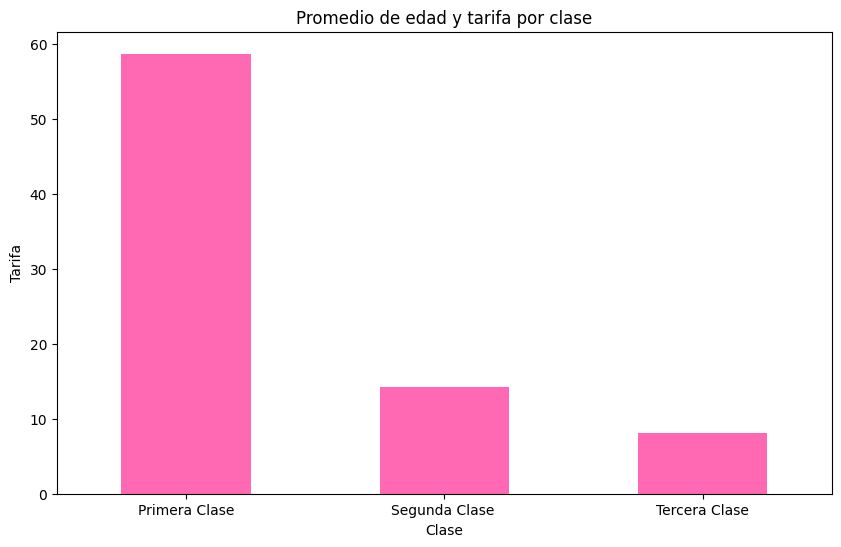

In [ ]:
import matplotlib.pyplot as plt



## Ejercicio 8: Crea una pivot table de edad promedio por sexo y clase

Pivot table de edad promedio por clase y sexo:
        Primera_clase  Segunda_clase  Tercera_clase
Sex                                                
female      34.240964      28.722973      21.750000
male        41.281386      30.740707      26.507589


<Axes: title={'center': 'Edad promedio de los pasajeros, por clase y genero'}, xlabel='Género', ylabel='Edad Promedio'>

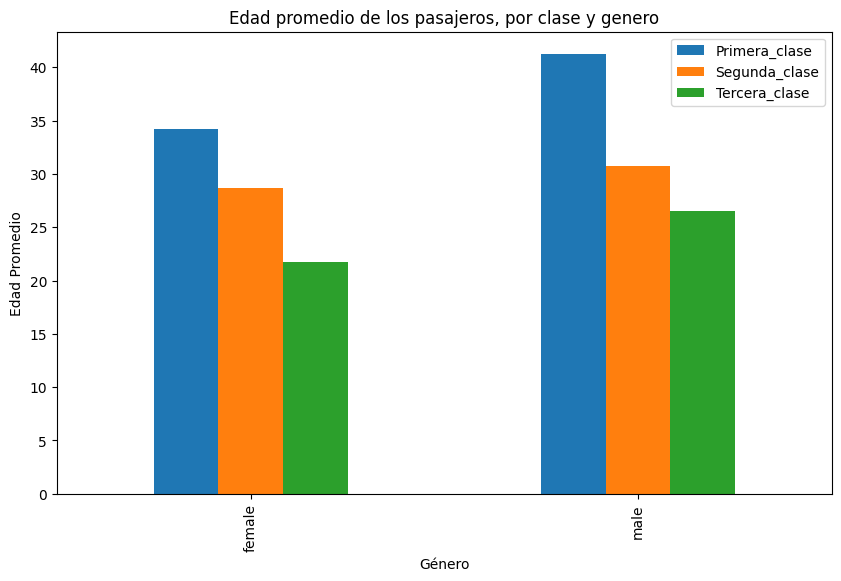

## Ejercicio 9: Concatenar sobrevivientes y no sobrevivientes

Vamos a separar sobrevivientes y no sobrevivientes, y luego los unimos de nuevo en un solo DataFrame.

In [ ]:
df_survived = df[df['Survived'] == '1']  # Filtramos solo los sobrevivientes

df_not_survived = df[df['Survived'] == '0'] # Filtramos los que no sobrevivieron

########################  # Los juntamos uno debajo del otro

print("Concatenación de sobrevivientes y no sobrevivientes:")
print(concatenado.shape)  # Verificamos que tiene el mismo número de columnas


Concatenación de sobrevivientes y no sobrevivientes:
(0, 15)


## Ejercicio 10: Merge por PassengerId
Vamos a unir dos tablas distintas por la columna 'PassengerId'. Esto es útil cuando tenemos información en diferentes fuentes.

In [ ]:
nombres = df[['PassengerId', 'Name']].copy()  # Creamos una tabla con solo el ID y el nombre

merged = nombres.merge(df,
                       on='PassengerId',
                       how='inner',
                       suffixes=('_Nombres','dataset'))  # Hacemos el merge usando PassengerId
print("Merge de nombres con dataset original:")
merged.head() # Mostramos cómo quedaron los nombres duplicados


Merge de nombres con dataset original:


,PassengerId,Name_Nombres,Survived,Pclass,Namedataset,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_Date,is_minor,age_group
0,1,"Braund, Mr. Owen Harris",0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1912-04-10T12:14:08Z,False,adulto
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1912-04-10T19:07:26Z,False,adulto
2,3,"Heikkinen, Miss. Laina",1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1912-04-10T16:15:48Z,False,adulto
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1912-04-10T13:26:46Z,False,adulto
4,5,"Allen, Mr. William Henry",0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1912-04-10T17:31:29Z,False,adulto


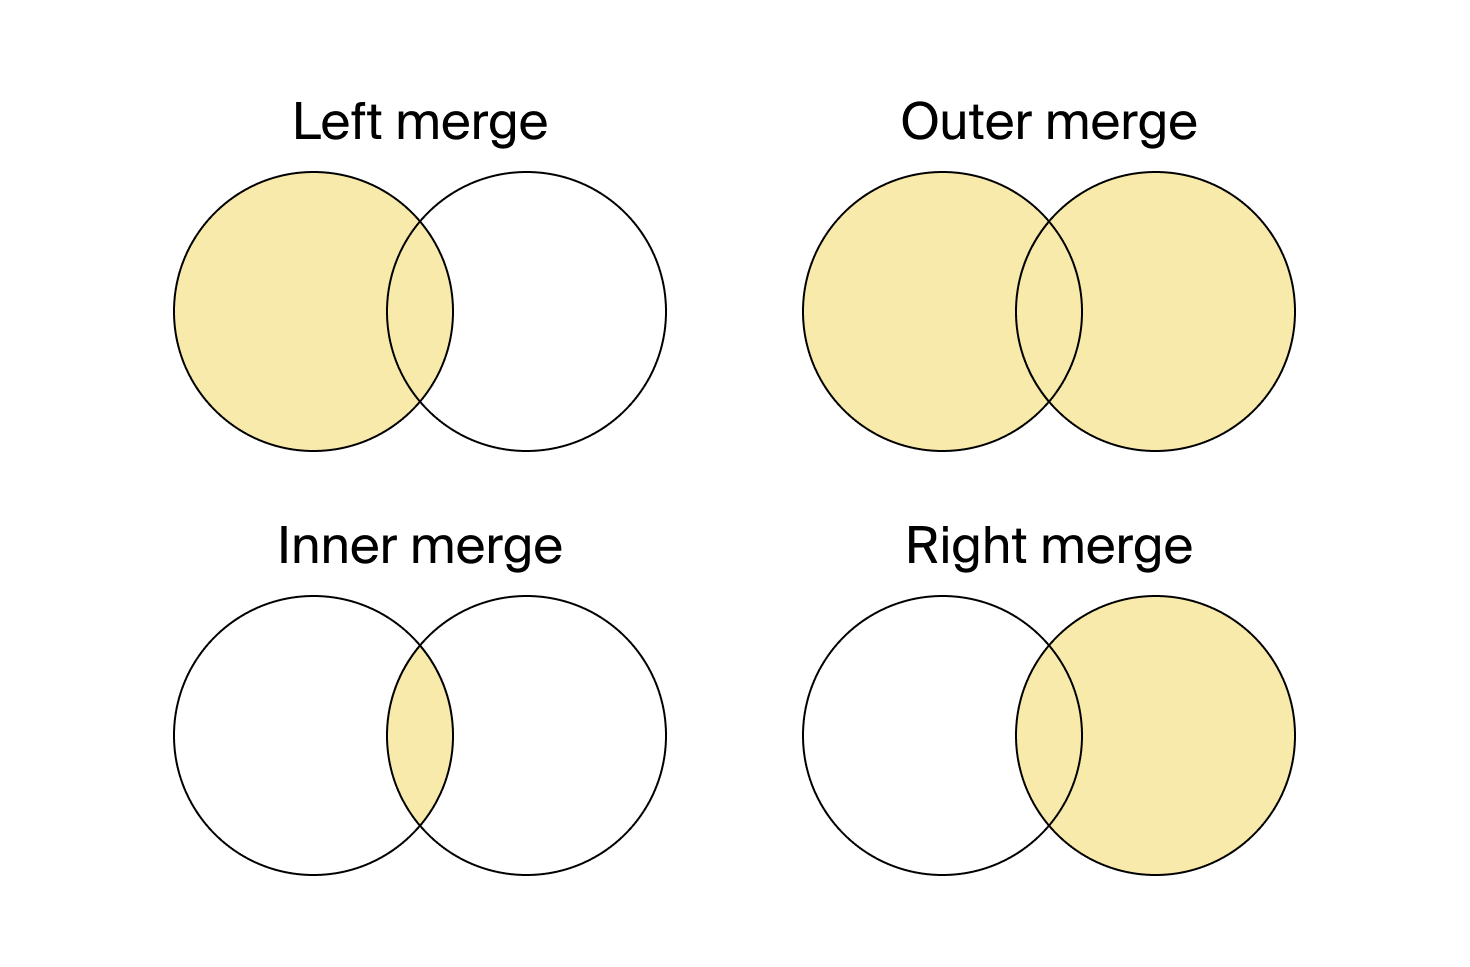

## Ejercicio 11: Conversión y acceso a componentes de fecha
Objetivo: Convertir la columna 'Embarked_Date' a tipo datetime, localizarla como UTC y extraer el año, mes y día en nuevas columnas.

In [ ]:
# Convertir la columna a datetime
df['Embarked_Date'] = pd.to_datetime(df['Embarked_Date'])

# Localizar como UTC (si no tiene zona horaria explícita)
#df['Embarked_Date'] = df['Embarked_Date'].dt.tz_localize('UTC')

# Crear nuevas columnas
df['Embarked_Year'] = df['Embarked_Date'].dt.year
df['Embarked_Month'] = df['Embarked_Date'].dt.month
df['Embarked_Day'] = df['Embarked_Date'].dt.day

# Verificar resultado
print(df[['Embarked_Date', 'Embarked_Year', 'Embarked_Month', 'Embarked_Day']].head())


              Embarked_Date  Embarked_Year  Embarked_Month  Embarked_Day
0 1912-04-10 12:14:08+00:00           1912               4            10
1 1912-04-10 19:07:26+00:00           1912               4            10
2 1912-04-10 16:15:48+00:00           1912               4            10
3 1912-04-10 13:26:46+00:00           1912               4            10
4 1912-04-10 17:31:29+00:00           1912               4            10


## Ejercicio 12: Agrupar pasajeros por día de embarque
Objetivo: Contar cuántos pasajeros abordaron en cada día (ignorando la hora).

In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Embarked_Date',
       'is_minor', 'age_group', 'Embarked_Year', 'Embarked_Month',
       'Embarked_Day', 'Only_Date'],
      dtype='object')

In [ ]:
# Convertir la fecha a solo fecha (sin hora)
df['Only_Date'] = df['Embarked_Date'].dt.date

# Contar cuántos pasajeros embarcaron por fecha
pasajeros_por_dia = df.groupby('Only_Date')['PassengerId'].count()

# Mostrar resultados
print(pasajeros_por_dia)

Only_Date
1912-04-10    812
1912-04-11     77
Name: PassengerId, dtype: int64


### 🧰 Resumen de métodos y funciones utilizadas

| Método / Función | Descripción |
|------------------|-------------|
| `pd.read_csv(url)` | Carga un dataset desde una URL o archivo `.csv`. |
| `df.head()` | Muestra las primeras filas del DataFrame. |
| `df.dtypes` | Muestra los tipos de datos de cada columna. |
| `df['col'].astype(tipo)` | Cambia el tipo de datos de una columna. |
| `pd.isna(valor)` / `df['col'].isna()` | Verifica si un valor o columna tiene datos faltantes (`NaN`). |
| `df['col'].apply(función)` | Aplica una función personalizada a cada valor de una columna. |
| `df['col'].fillna(valor)` | Rellena los valores nulos con un valor específico. |
| `df.dropna(subset=[col])` | Elimina filas donde cierta columna tiene datos nulos. |
| `df.groupby('col').agg({...})` | Agrupa por una columna y calcula estadísticas como `mean`, `sum`, etc. |
| `df.pivot_table(values, index, columns, aggfunc)` | Crea una tabla dinámica (pivot table) con estadísticas agregadas. |
| `df[df['col'] == valor]` | Filtra filas por condición booleana. |
| `pd.concat([df1, df2])` | Une verticalmente (apila) dos DataFrames. |
| `pd.merge(df1, df2, on='col', how='tipo')` | Une dos DataFrames horizontalmente (como una tabla relacional) por una columna común. |
| `df.copy()` | Crea una copia del DataFrame para evitar modificar el original. |


# Próxima sesión:  Visualización

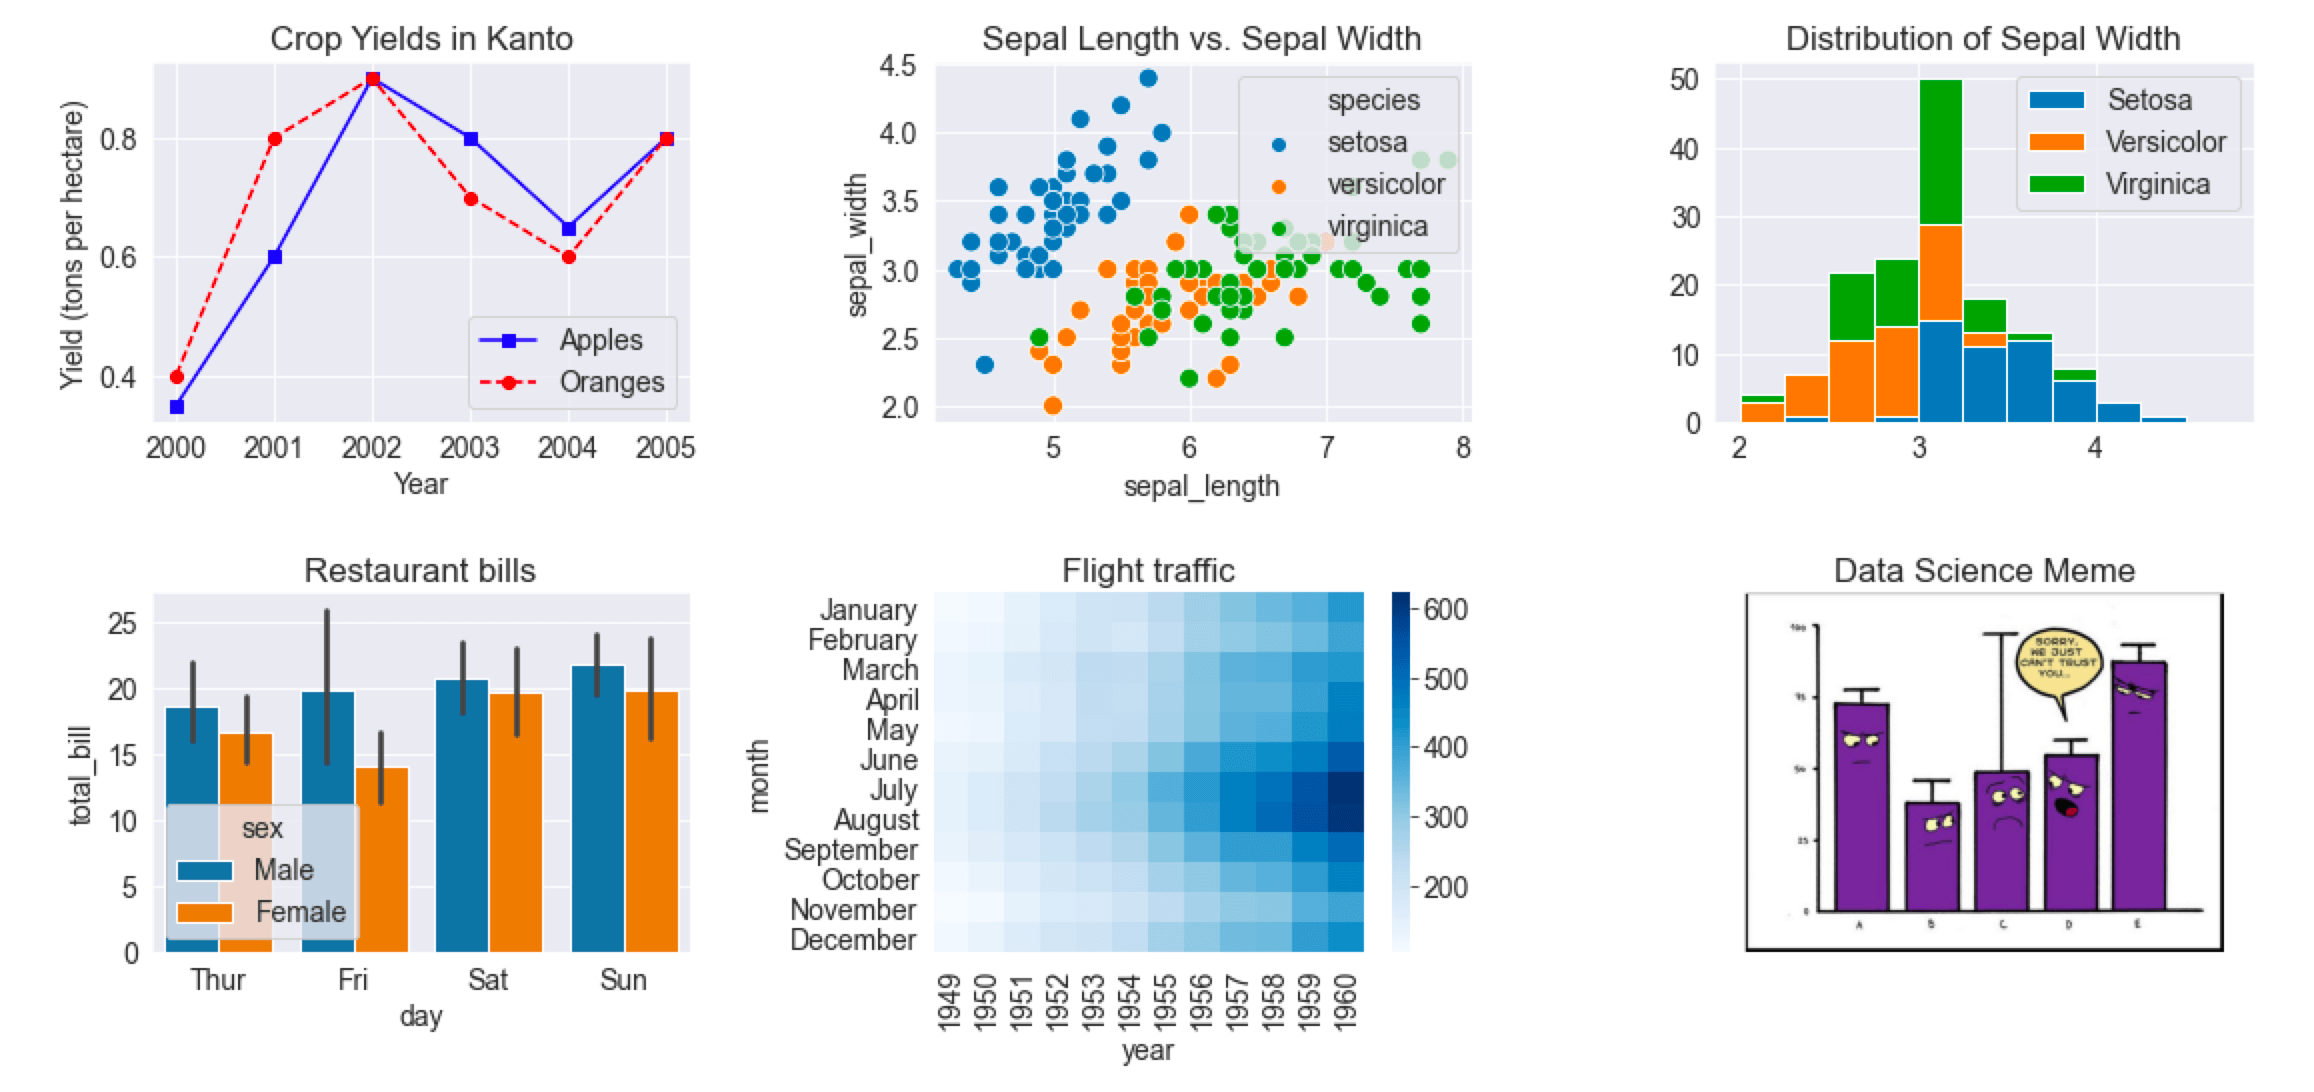